<a href="https://colab.research.google.com/github/altinodantas/slides/blob/main/PUCGO_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de dados na prática
Dataset obtido no repositório de Machine Learning da University of California, Irvine (UCI);

https://archive.ics.uci.edu/ml/datasets/Audit+Data

* bibiliotecas de manipulação e visualização de dados





In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* carregar o arquivo dos dados

In [2]:
df = pd.read_csv("trial.csv", sep=",")

* verificar o formando do dataset

In [3]:
df.shape

(776, 18)

* Visualizar o dataset

In [4]:
df.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [5]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Sector_score,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89
LOCATION_ID,23,6,6,6,6,6,7,8,8,8
PARA_A,4.18,0,0.51,0,0,0,1.1,8.5,8.4,3.98
SCORE_A,6,2,2,2,2,2,4,6,6,6
PARA_B,2.5,4.83,0.23,10.8,0.08,0.83,7.41,12.03,11.05,0.99
SCORE_B,2,2,2,6,2,2,4,6,6,2
TOTAL,6.68,4.83,0.74,10.8,0.08,0.83,8.51,20.53,19.45,4.97
numbers,5,5,5,6,5,5,5,5.5,5.5,5
Marks,2,2,2,6,2,2,2,4,4,2
Money_Value,3.38,0.94,0,11.75,0,2.95,44.95,7.79,7.34,1.93


In [6]:
# visualizar atributos e seus tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   SCORE_A        776 non-null    int64  
 4   PARA_B         776 non-null    float64
 5   SCORE_B        776 non-null    int64  
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    775 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

### Lidando com valores ausentes

In [7]:
# verificar a quantidade de ocorrências por valor existente
df['LOCATION_ID'].value_counts().sort_index()

1          11
11         26
12         47
13         35
14         20
15         35
16         52
17          1
18         16
19         68
2          41
20          5
21          8
22         24
23          1
24          1
25          6
27          8
28          8
29         21
3           3
30          4
31         12
32         29
33          1
34          1
35          2
36          4
37         10
38          4
39          9
4          37
40          3
41          1
42          1
43          7
44          1
5          44
6          33
7           4
8          76
9          53
LOHARU      1
NUH         1
SAFIDON     1
Name: LOCATION_ID, dtype: int64

In [8]:
# transformar os dados em numéricos
df['LOCATION_ID'] = pd.to_numeric(df['LOCATION_ID'], errors='coerce')

# verificar atributos com valores ausentes
df.isnull().sum(axis = 0)

Sector_score     0
LOCATION_ID      3
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [9]:
# visualizar só as instâncias que tem valores ausentes
df[df.isnull().sum(axis = 1) != 0]

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
351,1.99,NaN,0.30,2,0.0,2,0.30,5.0,2,0.00,2,2,0,2,0,2,2.0,0
355,1.99,NaN,0.55,2,0.0,2,0.55,5.0,2,0.67,2,2,0,2,0,2,2.0,0
367,1.99,NaN,0.48,2,0.0,2,0.48,5.0,2,0.47,2,2,0,2,0,2,2.0,0
642,55.57,4.0,0.23,2,0.0,2,0.23,5.0,2,NaN,2,2,0,2,0,2,2.0,0


In [10]:
# substituir valores ausentes de 'LOCATION_ID'
df['LOCATION_ID'] = df['LOCATION_ID'].fillna(-1)

# verificar a substituição
print(df["LOCATION_ID"].iloc[351])
print(df["LOCATION_ID"].iloc[355])
print(df["LOCATION_ID"].iloc[367])

-1.0
-1.0
-1.0


In [11]:
df.groupby('LOCATION_ID')['Score'].mean().sort_values(ascending=False).head(10)

LOCATION_ID
41.0    4.400000
24.0    4.200000
34.0    4.200000
42.0    4.000000
1.0     3.927273
38.0    3.800000
40.0    3.733333
7.0     3.550000
20.0    3.360000
30.0    3.350000
Name: Score, dtype: float64

In [12]:
# substituir valores ausentes de 'Money_Value'
df['Money_Value'] = df['Money_Value'].where(pd.notna(df['Money_Value']), df['Money_Value'].mean())

In [13]:
# verificar a substituição
print(df['Money_Value'].iloc[642])
print(df['Money_Value'].iloc[642] == df['Money_Value'].mean())

14.13763096774195
True


### Estatística descritiva

**visualizar estatísticas descritivas**

In [14]:
df.describe()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,14.795103,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,9.921136,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.563533,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,-1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,8.000000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,13.000000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.095000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,19.000000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.630000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,44.000000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


**visualizar estatísticas descritivas (filtrando algumas colunas)**

In [15]:
df.describe().T[:4]

,count,mean,std,min,25%,50%,75%,max
Sector_score,776.0,20.184536,24.319017,1.85,2.37,3.890,55.57,59.85
LOCATION_ID,776.0,14.795103,9.921136,-1.00,8.00,13.000,19.00,44.00
PARA_A,776.0,2.450194,5.678870,0.00,0.21,0.875,2.48,85.00
SCORE_A,776.0,3.512887,1.740549,2.00,2.00,2.000,6.00,6.00


**Plotando gráfico de barras para a variável alvo**

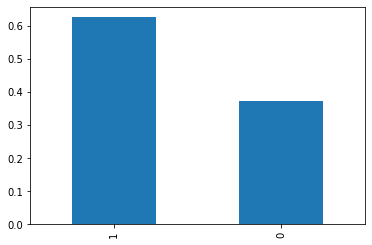

In [16]:
df["Risk"].value_counts(normalize=True).plot.bar();

**Plotando gráfico de densidade de probabilidades dos valores de Risco**

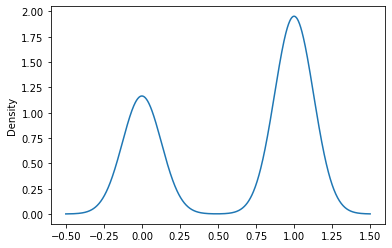

In [17]:
df["Risk"].plot.density();

**Visualizar distribuição das variáveis**

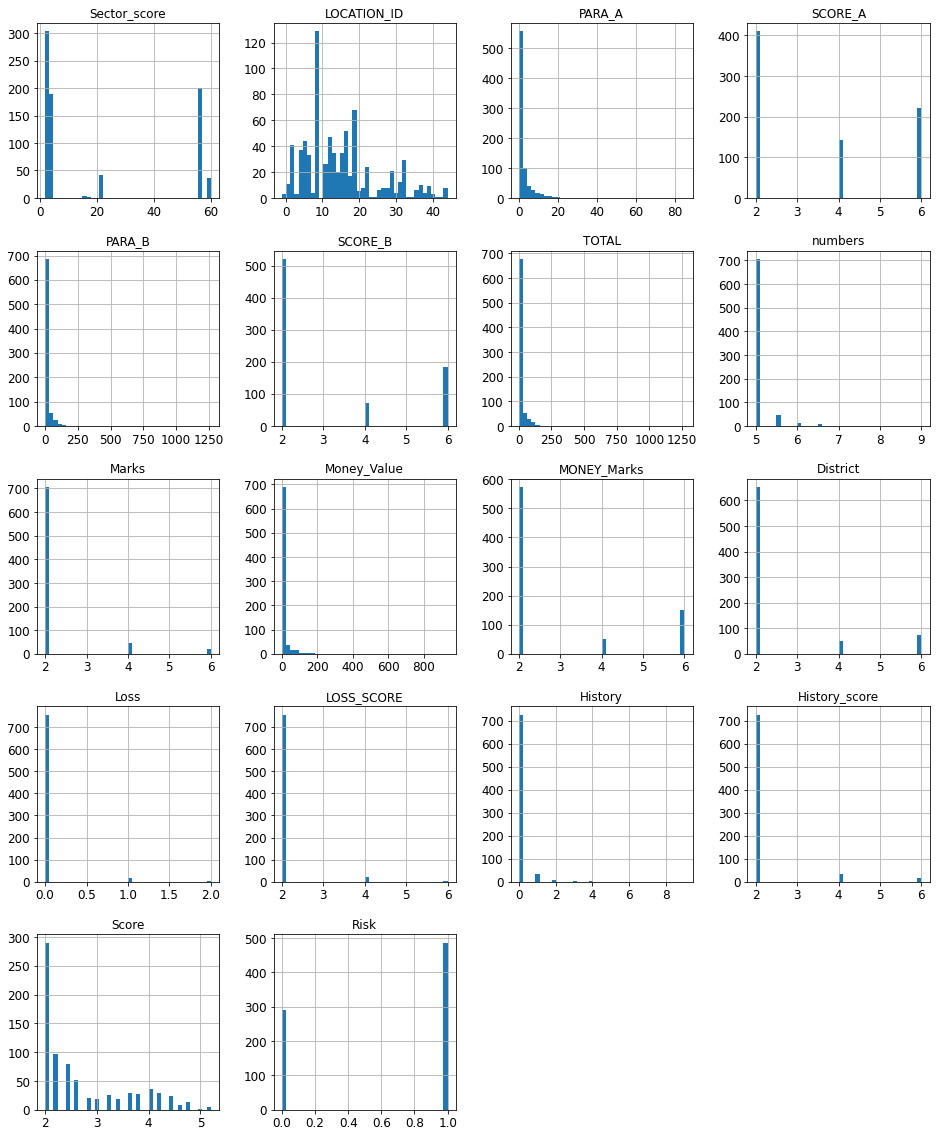

In [18]:
df.hist(figsize=(16, 20), bins=40, xlabelsize=12, ylabelsize=12);

### Correlações entre variáveis

**visualizar correlação entre as variáveis com mapa de calor**

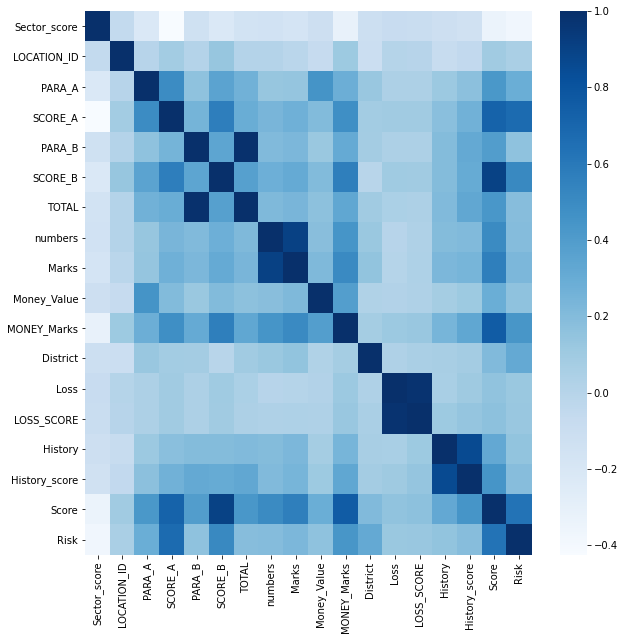

In [19]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='Blues');

**verificar a correlação entre as variáveis e a variável alvo**

In [20]:
df.corr()['Risk'][:-1].sort_values(ascending=False)

SCORE_A          0.671863
Score            0.632268
SCORE_B          0.515045
MONEY_Marks      0.440226
District         0.317795
PARA_A           0.292425
Marks            0.228098
numbers          0.197750
TOTAL            0.190793
History_score    0.190466
PARA_B           0.162807
Money_Value      0.160543
History          0.151937
LOSS_SCORE       0.127472
Loss             0.124322
LOCATION_ID      0.056306
Sector_score    -0.374588
Name: Risk, dtype: float64

**visualizar a correlação entre as variáveis e a variável alvo**

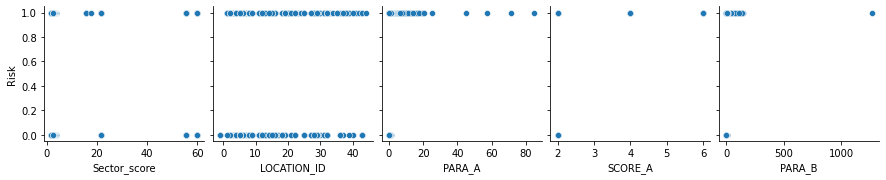

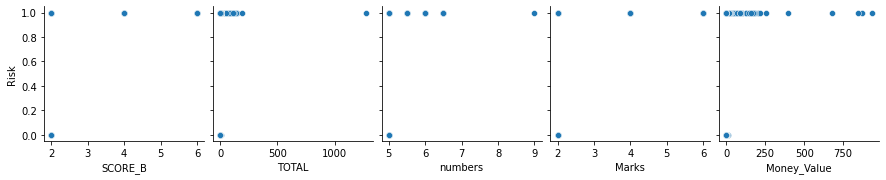

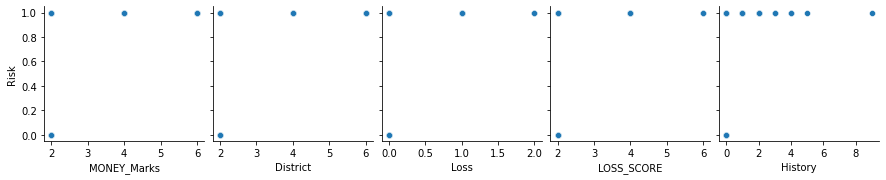

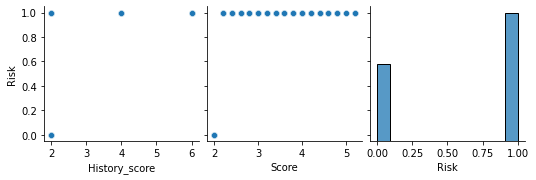

In [21]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df, x_vars=df.columns[i:i+5], y_vars=['Risk'])

### Visualizar a distribuição dos dados
 **Cada variável pela variável alvo (risco)**

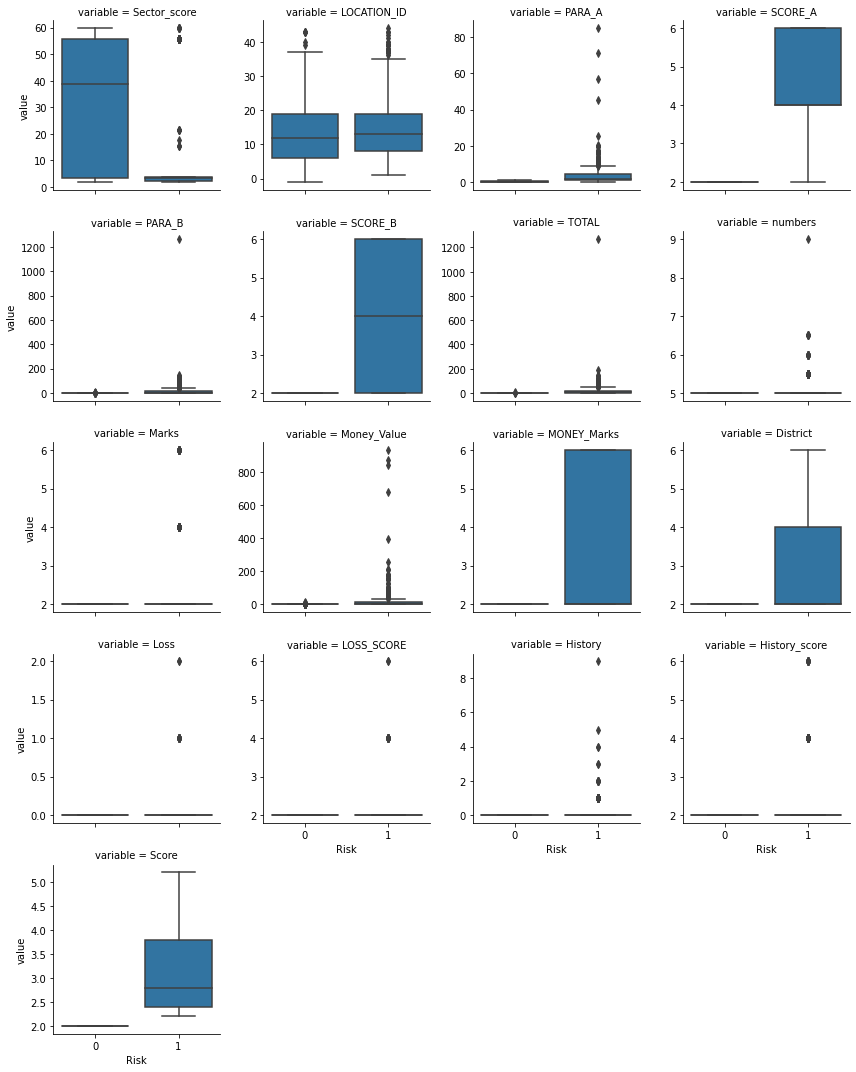

In [22]:
df_melt = df.melt(id_vars=["Risk"])
grid = sns.axisgrid.FacetGrid(df_melt[df_melt.variable.isin(df.columns)], 
                              col='variable', col_wrap=4, sharey=False)
grid.map(sns.boxplot, "Risk","value", order=None);

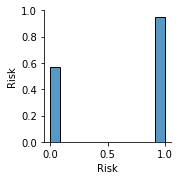

In [23]:
sns.pairplot(data=df, x_vars=df[['Risk']], y_vars=['Risk']);

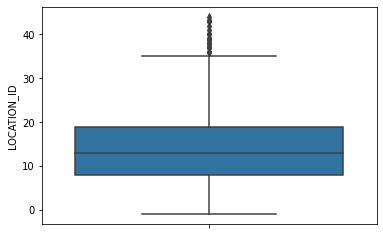

In [24]:
sns.boxplot(y=df['LOCATION_ID']);